What is the most 3 demand Skills for THe top 3 roles ?? 

In [1]:
import pandas as pd
import seaborn as sns
import ast
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("cleaned_data.csv")
df['job_skills'] = df['job_skills'].apply(
    lambda skills_list : ast.literal_eval(skills_list) if pd.notna(skills_list) else skills_list
)

In [3]:
df_US = df[df.job_country == "United States"]

df_skills = df_US.explode("job_skills")
df_skills_count = df_skills.groupby(["job_skills" , "job_title_short"]).size()
df_skills_count = df_skills_count.reset_index(name="skill_count")
df_skills_count.sort_values(by="skill_count" , ascending=False, inplace=True)

In [4]:
job_titles = df_skills_count.job_title_short.unique().tolist()
job_titles = sorted(job_titles[:3])

In [5]:
df_us_job_count = df_US["job_title_short"].value_counts().reset_index(name="jobs_total")

df_likelilooh = pd.merge(df_us_job_count , df_skills_count , how="left" ,on="job_title_short")
df_likelilooh["percenteage"] = (df_likelilooh.skill_count / df_likelilooh.jobs_total) * 100

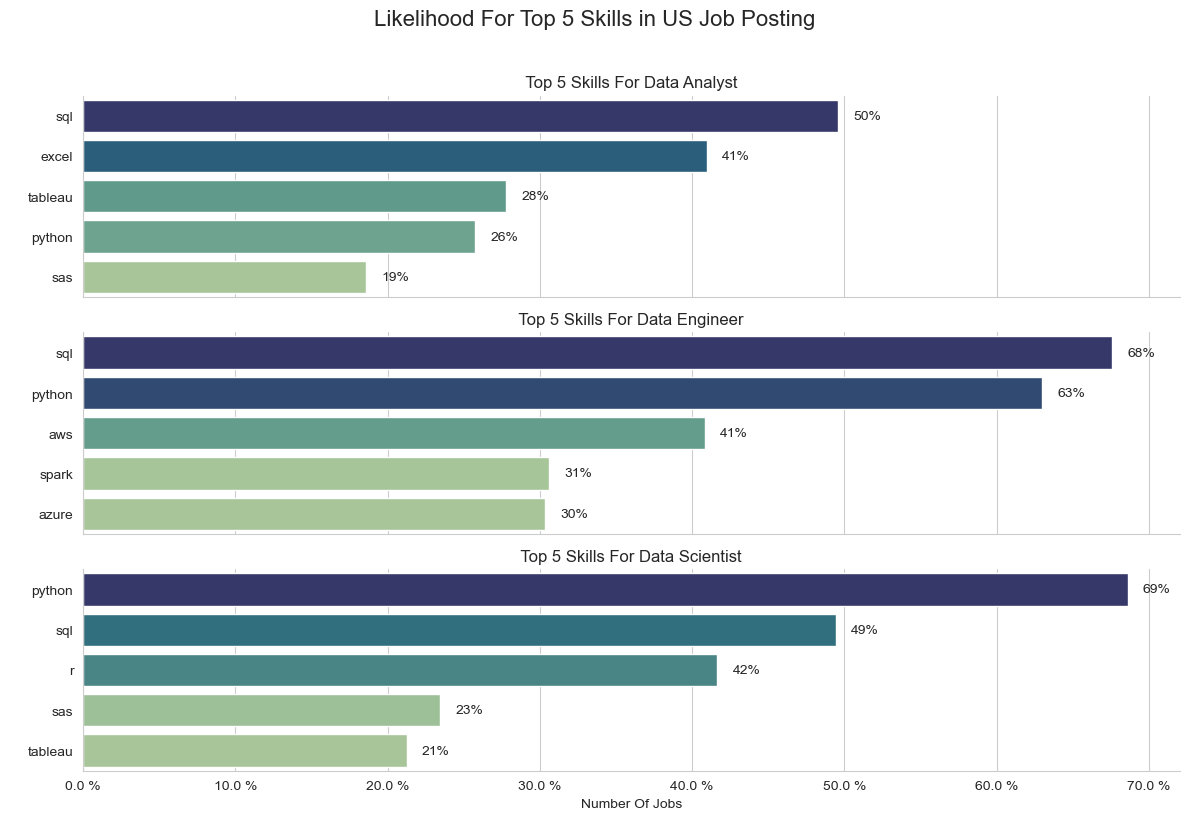

In [6]:
sns.set_style(style="whitegrid")

fig, ax = plt.subplots(len(job_titles), 1, figsize=(12, 8),sharex=True) 
fig.suptitle("Likelihood For Top 5 Skills in US Job Posting",fontsize=16, y=1.02)

for i, job_title in enumerate(job_titles): 
    df_plot = df_likelilooh[df_likelilooh.job_title_short == job_title].head(5)
    
    # Plot on the corresponding axis
    sns.barplot(
        data=df_plot, 
        x="percenteage", 
        y="job_skills",
        hue="skill_count",
        legend=False,
        palette="crest",
        ax=ax[i]  # Specify the axis for each plot
    )
    
    for n, v in enumerate(df_plot["percenteage"]):
        ax[i].text(v + 1, n, f"{v:.0f}%", va="center")
    # Remove unnecessary spines and set title and labels
    sns.despine(ax=ax[i])
    ax[i].set_title(f" Top 5 Skills For {job_title} ")
    ax[i].set_xlabel("Number Of Jobs")
    ax[i].set_ylabel("")
    ax[i].xaxis.set_major_formatter(lambda x , _ : f'{x} %')


plt.ylabel(" ")
plt.tight_layout()
plt.show()
